In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

import pandas as pd
import xarray as xr
from datetime import datetime, timedelta

import json

# %matplotlib notebook

## Import measures

Lexplore

In [3]:
meas_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\Lexplore weather data"
meas_nc_files = glob.glob(os.path.join(meas_folder, f'*.nc'))

In [4]:
ds_meas = xr.open_mfdataset(meas_nc_files, combine="by_coords", engine='netcdf4')

ds_meas.to_netcdf(r'../../data/meteo/geneva/Lexplore_2024.nc')

Pully

In [5]:
puy_json_path = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\Pully weather data\puy_from_alplakes.json"

In [6]:
with open(puy_json_path, 'r') as file:
    puy_data = json.load(file)

In [7]:
puy_time = np.array([np.datetime64(time, 'ns') for time in puy_data['time']])

C:\Users\leroquan\AppData\Local\Temp\ipykernel_12348\3477373665.py:1: UserWarning: no explicit representation of timezones available for np.datetime64
  puy_time = np.array([np.datetime64(time, 'ns') for time in puy_data['time']])


In [8]:
puy_data['variables'].keys()

dict_keys(['vapour_pressure', 'global_radiation', 'air_temperature', 'precipitation', 'wind_speed', 'wind_direction'])

## Cosmo

In [9]:
cosmo_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\cosmo"

In [10]:
cosmo_temp_path = os.path.join(cosmo_folder, 'atemp.bin')
with open(cosmo_temp_path, 'rb') as fid:
    cosmo_data_temp = np.fromfile(fid, dtype='>f8')

In [11]:
nx = 1344 / 4
ny = 528 / 4
nt = len(cosmo_data_temp) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 2952.0


In [12]:
start_date = np.datetime64('2024-04-01T00:00:00', 'ns')

date_list = np.array([start_date + np.timedelta64(i, 'h') for i in range(int(nt))])

In [13]:
m_lexplore = 49850 / 200
n_lexplore = 18100 / 200

## ICON

In [14]:
icon_folder = r"C:\Users\leroquan\Documents\00-Work_space\13-Geneva MITgcm calibration\Weather forcing analysis - Geneva Lexplore\icon"

In [15]:
icon_temp_path = os.path.join(icon_folder, 'atemp.bin')
with open(icon_temp_path, 'rb') as fid:
    icon_data_temp = np.fromfile(fid, dtype='>f8')

In [16]:
nt_icon=len(icon_data_temp)/ nx /ny

In [17]:
start_date_icon = np.datetime64('2024-08-01T00:00:00', 'ns')
date_list_icon = np.array([start_date_icon + np.timedelta64(i, 'h') for i in range(int(nt_icon))])

## Temperature

In [18]:
cosmo_array = np.reshape(cosmo_data_temp, (int(nt),int(ny),int(nx)))

In [19]:
icon_array = np.reshape(icon_data_temp, (int(nt_icon),int(ny),int(nx)))

In [20]:
puy_temp = puy_data['variables']['air_temperature']['data']

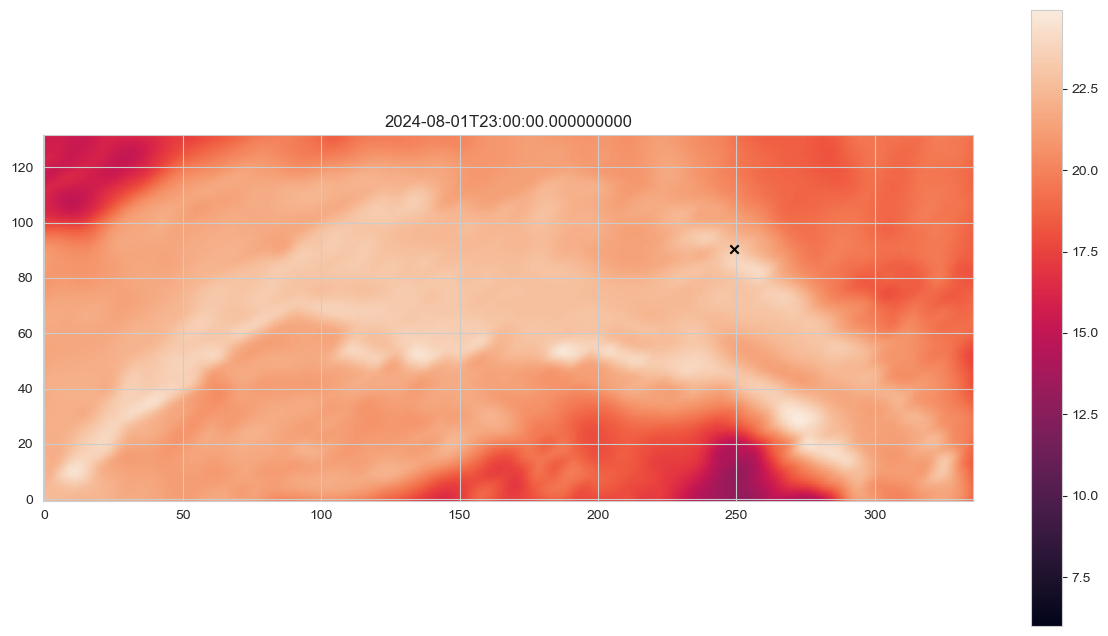

In [21]:
i_time = -1
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_array[i_time,:,:]-273.15, vmin=6)
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

In [22]:
%matplotlib notebook
# Léxplore
start_plot = np.datetime64('2024-01-01T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['AirTC'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_temp, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_array[:,int(n_lexplore), int(m_lexplore)]-273.15, label='Cosmo LéXPLORE', color='b')
plt.plot(date_list_icon, icon_array[:,int(n_lexplore), int(m_lexplore)]-273.15, label='Icon LéXPLORE', color='g')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [23]:
import seaborn as sns

In [24]:
ds_meas_resampled = ds_meas['AirTC'].sel(time=slice(date_list[0], date_list[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Cosmo reanalysis': cosmo_array[:,int(n_lexplore), int(m_lexplore)]-273.15
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Cosmo reanalysis": "royalblue"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Air temperature {pd.Timestamp(date_list[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Air temperature [°C]') 

C:\Users\leroquan\AppData\Local\anaconda3\envs\mitgcm_env\lib\site-packages\seaborn\_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


ConversionError: Failed to convert value(s) to axis units: array(['2024-01-05T00:00:00.000000000', '2024-01-05T00:10:00.000000000',
       '2024-01-05T00:20:00.000000000', ...,
       '2025-01-05T23:30:00.000000000', '2025-01-05T23:40:00.000000000',
       '2025-01-05T23:50:00.000000000'],
      shape=(51805,), dtype='datetime64[ns]')

In [ ]:
ds_meas_resampled = ds_meas['AirTC'].sel(time=slice(date_list_icon[0], date_list_icon[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Icon reanalysis': icon_array[:,int(n_lexplore), int(m_lexplore)]-273.15
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Icon reanalysis": "green"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Air temperature {pd.Timestamp(date_list_icon[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list_icon[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Air temperature [°C]') 

# Radiation

In [ ]:
cosmo_sw_path = os.path.join(cosmo_folder, 'swdown.bin')
with open(cosmo_sw_path, 'rb') as fid:
    cosmo_data_sw = np.fromfile(fid, dtype='>f8')
    
cosmo_data_sw = np.reshape(cosmo_data_sw, (int(nt),int(ny),int(nx)))

In [ ]:
icon_sw_path = os.path.join(icon_folder, 'swdown.bin')
with open(icon_sw_path, 'rb') as fid:
    icon_data_sw = np.fromfile(fid, dtype='>f8')
    
icon_data_sw = np.reshape(icon_data_sw, (int(nt_icon),int(ny),int(nx)))

In [ ]:
puy_rad = puy_data['variables']['global_radiation']['data']

In [ ]:
i_time = 12
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_sw[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

In [ ]:
# Léxplore
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['Slrw'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_rad, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

In [ ]:
ds_meas_resampled = ds_meas['Slrw'].sel(time=slice(date_list[0], date_list[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Cosmo reanalysis': cosmo_data_sw[:,int(n_lexplore), int(m_lexplore)]
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Cosmo reanalysis": "royalblue"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Radiation {pd.Timestamp(date_list[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Radiation [W.m-2]') 

In [ ]:
ds_meas_resampled = ds_meas['Slrw'].sel(time=slice(date_list_icon[0], date_list_icon[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Icon reanalysis': icon_data_sw[:,int(n_lexplore), int(m_lexplore)]
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Icon reanalysis": "green"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Radiation {pd.Timestamp(date_list_icon[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list_icon[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Radiation [W.m-2]') 

# Long-wave Radiation

In [25]:
cosmo_sw_path = os.path.join(cosmo_folder, 'lwdown.bin')
with open(cosmo_sw_path, 'rb') as fid:
    cosmo_data_sw = np.fromfile(fid, dtype='>f8')
    
cosmo_data_sw = np.reshape(cosmo_data_sw, (int(nt),int(ny),int(nx)))

In [26]:
icon_sw_path = os.path.join(icon_folder, 'lwdown.bin')
with open(icon_sw_path, 'rb') as fid:
    icon_data_sw = np.fromfile(fid, dtype='>f8')
    
icon_data_sw = np.reshape(icon_data_sw, (int(nt_icon),int(ny),int(nx)))

In [29]:
puy_rad = puy_data['variables']['global_radiation']['data']

In [30]:
i_time = 12
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_sw[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

<IPython.core.display.Javascript object>

In [31]:
# Léxplore
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['Slrw'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_rad, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_sw[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

<IPython.core.display.Javascript object>

In [0]:
ds_meas_resampled = ds_meas['Slrw'].sel(time=slice(date_list[0], date_list[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Cosmo reanalysis': cosmo_data_sw[:,int(n_lexplore), int(m_lexplore)]
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Cosmo reanalysis": "royalblue"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Radiation {pd.Timestamp(date_list[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Radiation [W.m-2]') 

In [0]:
ds_meas_resampled = ds_meas['Slrw'].sel(time=slice(date_list_icon[0], date_list_icon[-1])).resample(time="1h").mean()
df = pd.DataFrame({
        'LéXPLORE measures': ds_meas_resampled.values,
        'Icon reanalysis': icon_data_sw[:,int(n_lexplore), int(m_lexplore)]
    })
df_melted = df.melt(var_name="Category", value_name="Value")

custom_palette = {
    "LéXPLORE measures": "r",
    "Icon reanalysis": "green"
}

sns.violinplot(y="Value", data=df_melted, hue="Category", split=True, gap=0, inner="quart", palette=custom_palette)
plt.title(f"Radiation {pd.Timestamp(date_list_icon[0]).strftime('%d.%m.%Y')} - {pd.Timestamp(date_list_icon[-1]).strftime('%d.%m.%Y')}")
plt.ylabel('Radiation [W.m-2]') 

## Wind speed

In [ ]:
cosmo_u10_path = os.path.join(cosmo_folder, 'u10.bin')
with open(cosmo_u10_path, 'rb') as fid:
    cosmo_data_u10 = np.fromfile(fid, dtype='>f8')
    
cosmo_data_u10 = np.reshape(cosmo_data_u10, (int(nt),int(ny),int(nx)))

In [ ]:
cosmo_v10_path = os.path.join(cosmo_folder, 'v10.bin')
with open(cosmo_v10_path, 'rb') as fid:
    cosmo_data_v10 = np.fromfile(fid, dtype='>f8')
    
cosmo_data_v10 = np.reshape(cosmo_data_v10, (int(nt),int(ny),int(nx)))

In [ ]:
cosmo_data_ws = np.sqrt(cosmo_data_u10**2 + cosmo_data_v10**2)

In [ ]:
icon_u10_path = os.path.join(icon_folder, 'u10.bin')
with open(icon_u10_path, 'rb') as fid:
    icon_data_u10 = np.fromfile(fid, dtype='>f8')
    
icon_data_u10 = np.reshape(icon_data_u10, (int(nt_icon),int(ny),int(nx)))

In [ ]:
icon_v10_path = os.path.join(icon_folder, 'v10.bin')
with open(icon_v10_path, 'rb') as fid:
    icon_data_v10 = np.fromfile(fid, dtype='>f8')
    
icon_data_v10 = np.reshape(icon_data_v10, (int(nt_icon),int(ny),int(nx)))

In [ ]:
icon_data_ws = np.sqrt(icon_data_u10**2 + icon_data_v10**2)

In [ ]:
puy_ws = puy_data['variables']['wind_speed']['data']
puy_wd = puy_data['variables']['wind_direction']['data']

In [ ]:
i_time = 10
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_ws[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

In [ ]:
# LéXPLORE
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WS'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_ws, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_ws[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_ws[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

In [ ]:
cosmo_data_wd = (270 - np.degrees(np.arctan2(cosmo_data_v10, cosmo_data_u10))) % 360
icon_data_wd = (270 - np.degrees(np.arctan2(icon_data_v10, icon_data_u10))) % 360

In [ ]:
# Léxplore
start_plot = np.datetime64('2024-01-01T00:00:00', 'ns')
end_plot = np.datetime64('2025-01-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WindDir'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_wd, label='Measure Pully', color='darkred')
plt.plot(date_list, cosmo_data_wd[:,int(n_lexplore), int(m_lexplore)], label='Cosmo LéXPLORE')
plt.plot(date_list_icon, icon_data_wd[:,int(n_lexplore), int(m_lexplore)], label='Icon LéXPLORE')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

In [ ]:
# Léxplore
start_plot = np.datetime64('2024-08-01T00:00:00', 'ns')
end_plot = np.datetime64('2024-09-01T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['WS'].plot(label="Measure LéXPLORE", color='r')
plt.plot(puy_time, puy_ws, label='Measure Pully', color='darkred')
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

## Surface pressure

In [ ]:
cosmo_press_path = os.path.join(cosmo_folder, 'apressure.bin')
with open(cosmo_press_path, 'rb') as fid:
    cosmo_data_press = np.fromfile(fid, dtype='>f8')
    
cosmo_data_press = np.reshape(cosmo_data_press, (int(nt),int(ny),int(nx)))

In [ ]:
i_time = 12
fig = plt.figure(figsize=(15,8))
plt.scatter(m_lexplore, n_lexplore, marker='x', color='black')
plt.imshow(cosmo_data_press[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()

In [ ]:
# Léxplore
start_plot = np.datetime64('2024-01-15T00:00:00', 'ns')
end_plot = np.datetime64('2024-02-15T00:00:00', 'ns')

plt.figure(figsize=(15,8))
ds_meas['BP'].plot(label="Measure LéXPLORE", color='r') 
plt.plot(date_list, cosmo_data_press[:,int(n_lexplore), int(m_lexplore)] / 100, label='Cosmo LéXPLORE') # 1 mbar = 100 pascals (Pa)
plt.xlim(left = start_plot, right = end_plot)
plt.legend()

In [ ]:
ds_meas